In [1]:
import numpy as np
from matplotlib import pyplot as plt

#import cosmowap libraries
import cosmo_wap as cw
import cosmo_wap.bk as bk #import terms for the bispectrum
import cosmo_wap.pk as pk #import terms for the powerspectrum

/home/addis/miniconda3/envs/cobaya_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## get cosmology with class

In [ ]:
cosmo = cw.lib.utils.get_cosmology() # k_max needs to be 100 for use in compute_bias parts

# So we need to also define survey specific parameters like biases

In [40]:
survey_params = cw.survey_params.SurveyParams(cosmo)

# so we have a bunch of preset surveys 
print("Survey specific params:",survey_params.Euclid.__dict__.keys())

Survey specific params: dict_keys(['b_1', 'z_range', 'be_survey', 'Q_survey', 'n_g', 'f_sky'])


### CosmologicalFunctions takes in the cosmology and a survey_params dict

In [4]:
survey_params.Euclid.b_1 = lambda xx: 5 + 1*xx
#survey_params.Euclid.Q_survey = lambda xx: -2/5 + 0*xx
#survey_params.Euclid.be_survey = lambda xx: 0 + 0*xx

In [29]:
#so now we can compute terms for this cosmology and for euclid-likes biases
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid],compute_bias=True)

Computing bias params...


### functions have this format
- xxx.lx(cosmo_funcs,kk,zz,t=0)


### So now ecerything is set up - let's plot the monopole

In [44]:
# pick z and k range
zz=1 # redshift
kk = np.linspace(0.001,0.13,500)

Text(0.5, 0, '$k $ [h/Mpc]')

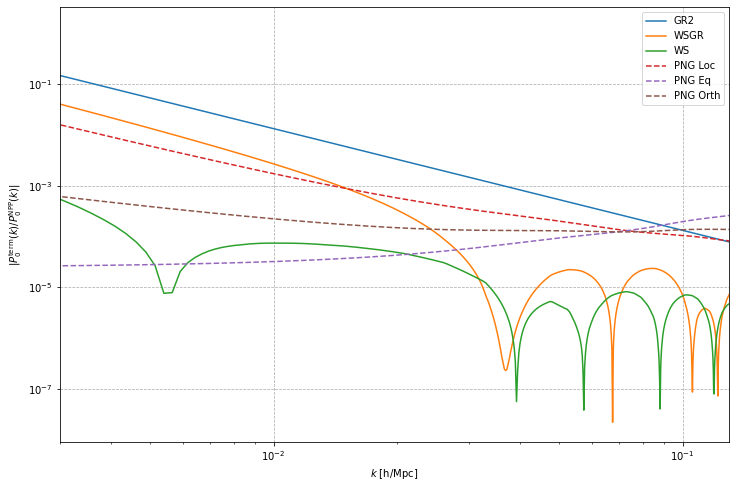

In [47]:
#for monopole 
plt.figure(figsize=(12,8))

#set LOS to t=1/2 - this is the natural choice for your theory for the monopole
t=1/2

#lets plot as fraction of monopole - NPP (Newtonian Plane-Parallel)
norm = np.abs(pk.NPP.l0(cosmo_funcs,kk,zz=1,t=t).real)

#regular newtonian expression
plt.loglog(kk,np.abs(pk.GR2.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,label='GR2')   # pure GR
plt.loglog(kk,np.abs(pk.WSGR.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,label='WSGR') #GR/WS mixing
plt.loglog(kk,np.abs(pk.WS.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,label='WS')     # pure WS

plt.loglog(kk,np.abs(pk.Loc.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,'--',label='PNG Loc')
plt.loglog(kk,np.abs(pk.Eq.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,'--',label='PNG Eq')
plt.loglog(kk,np.abs(pk.Orth.l0(cosmo_funcs,kk,zz=zz,t=t).real)/norm,'--',label='PNG Orth')
plt.legend()
plt.xlim(0.003,0.13)

plt.ylabel(r'$| P^{\rm term}_0(k)/P^{\rm NPP}_0(k) |$')
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')


Computing bias params...


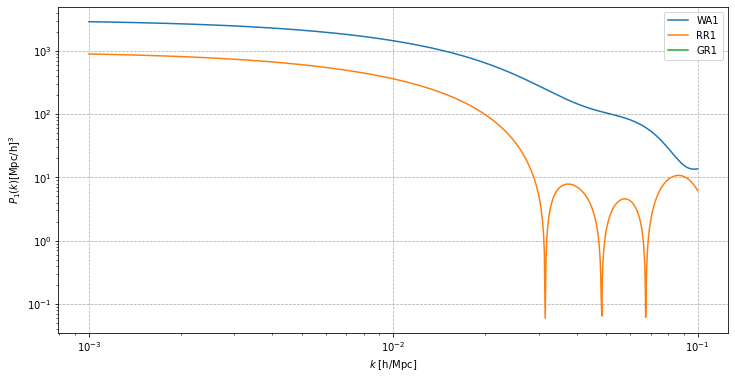

In [38]:
# for dipole
plt.figure(figsize=(12,6))
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid],compute_bias=True)

plt.plot(kk,np.abs(pk.WA1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='WA1')
plt.plot(kk,np.abs(pk.RR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='RR1')
plt.plot(kk,np.abs(pk.GR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_1(k) $[Mpc/h$]^3$')
plt.show()

## Or we can consider the multi-tracer case 

In [39]:
# just get a different version of cosmo_funcs with two tracers
cosmo_funcs = cw.ClassWAP(cosmo,[survey_params.Euclid,survey_params.SKAO2],compute_bias=False)

#note: compute_bias only has valid hmf and HOD for Euclid atm

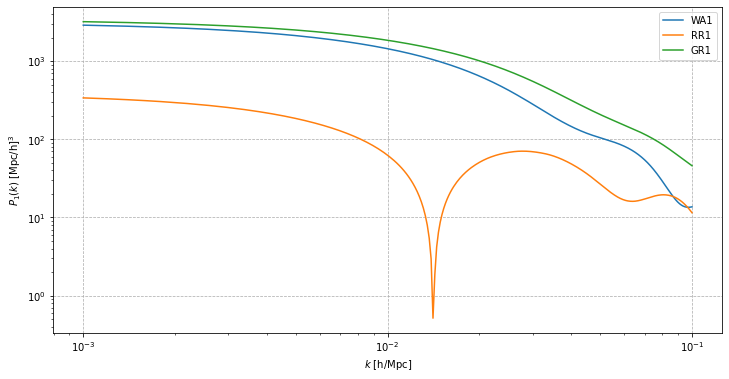

In [36]:
# for dipole - now the GR part does not cancel
plt.figure(figsize=(12,6))

plt.plot(kk,np.abs(pk.WA1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='WA1')
plt.plot(kk,np.abs(pk.RR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='RR1')
plt.plot(kk,np.abs(pk.GR1.l1(cosmo_funcs,kk,zz=1,t=0).imag),label='GR1')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(ls='--',lw=0.75)
plt.xlabel(r'$k $ [h/Mpc]')
plt.ylabel(r'$ P_1(k) $ [Mpc/h$]^3$')
plt.show()